In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('results.csv')
df.head()

,name,missing_values,mv_percentage,imputer_method,outlier_method,normalization_method,classification_method,knn_neighbors,mlp_activation,mlp_first_layer,mlp_second_layer,mlp_max_iter,mlp_learning_rate,mlp_learning_rate_init,mlp_tol,accuracy,precision,recall,f1
0,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,0.918375,0.934126,0.927462,0.930438
1,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,0.916832,0.931747,0.926042,0.928448
2,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,0.916758,0.931956,0.926302,0.928805
3,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,0.919770,0.934679,0.929191,0.931597
4,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,0.919770,0.934777,0.928520,0.931324


In [4]:
columns_to_convert = ['accuracy', 'precision', 'recall', 'f1']

df[columns_to_convert] = (df[columns_to_convert] * 100).round(2)
df.head()

,name,missing_values,mv_percentage,imputer_method,outlier_method,normalization_method,classification_method,knn_neighbors,mlp_activation,mlp_first_layer,mlp_second_layer,mlp_max_iter,mlp_learning_rate,mlp_learning_rate_init,mlp_tol,accuracy,precision,recall,f1
0,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,91.84,93.41,92.75,93.04
1,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,91.68,93.17,92.60,92.84
2,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,91.68,93.20,92.63,92.88
3,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,91.98,93.47,92.92,93.16
4,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,91.98,93.48,92.85,93.13


[]

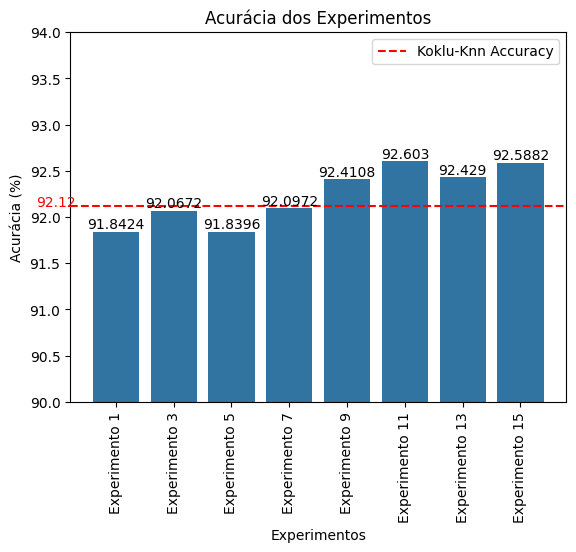

In [10]:
df_knn = df[(df['classification_method'] == 'knn') & (df['name'] != 'Koklu-knn-minmax') & (df['name'] != 'Koklu-knn--1')]


# Add horizontal line for Koklu-Knn accuracy
koklu_knn_accuracy = df[df['name'] == 'Koklu-knn-minmax']['accuracy'].values[0]
plt.axhline(y=koklu_knn_accuracy, color='r', linestyle='--', label='Koklu-Knn Accuracy')
plt.text(-0.7, koklu_knn_accuracy, str(koklu_knn_accuracy), color='Red', ha='right', fontsize=10)
ax = sns.barplot(df, y=df_knn["accuracy"], x=df_knn.name, errorbar=None)

plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
plt.xlabel("Experimentos")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(ylim=(90, 94))
ax.plot()

[(80.0, 95.0)]

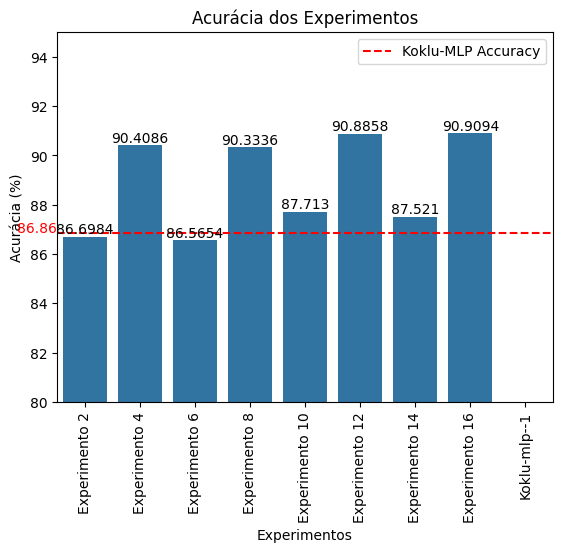

In [11]:
df_mlp = df[(df['classification_method'] == 'mlp') & (df['name'] != 'Koklu-mlp-minmax') & (df['name'] != 'Koklu-knn--1')]
# Add horizontal line for Koklu-MLP accuracy
koklu_mlp_accuracy = df[df['name'] == 'Koklu-mlp-minmax']['accuracy'].values[0]
plt.axhline(y=koklu_mlp_accuracy, color='r', linestyle='--', label='Koklu-MLP Accuracy')
plt.text(-0.5, koklu_mlp_accuracy, str(koklu_mlp_accuracy), color='Red', ha='right', fontsize=10)
ax = sns.barplot(df, y=df_mlp["accuracy"], x=df_mlp.name, errorbar=None)
plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
plt.xlabel("Experimentos")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(ylim=(80, 95))


[]

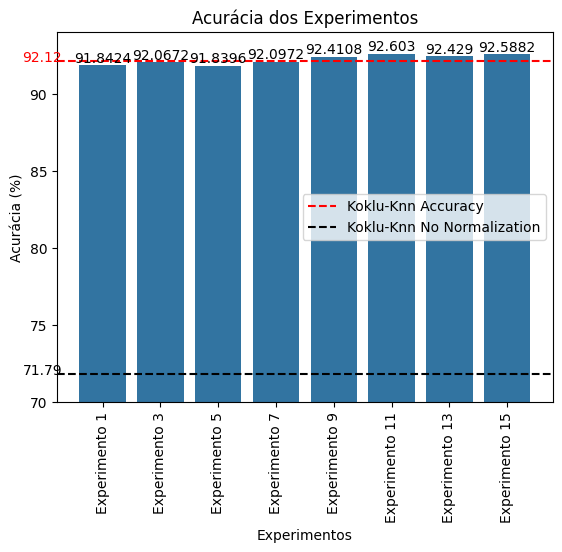

In [17]:
df_knn = df[(df['classification_method'] == 'knn') & (df['name'] != 'Koklu-knn-minmax') & (df['name'] != 'Koklu-knn--1')]


# Add horizontal line for Koklu-Knn accuracy
koklu_knn_accuracy = df[df['name'] == 'Koklu-knn-minmax']['accuracy'].values[0]
koklu_knn_no_normalization = df[df['name'] == 'Koklu-knn--1']['accuracy'].values[0]
plt.axhline(y=koklu_knn_accuracy, color='r', linestyle='--', label='Koklu-Knn Accuracy')
plt.axhline(y=koklu_knn_no_normalization, color='black', linestyle='--', label='Koklu-Knn No Normalization')
plt.text(-0.7, koklu_knn_accuracy, str(koklu_knn_accuracy), color='Red', ha='right', fontsize=10)
plt.text(-0.7, koklu_knn_no_normalization, str(koklu_knn_no_normalization), color='Black', ha='right', fontsize=10)
ax = sns.barplot(df, y=df_knn["accuracy"], x=df_knn.name, errorbar=None)

plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
plt.xlabel("Experimentos")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(ylim=(70, 94))
ax.plot()

[(10.0, 95.0)]

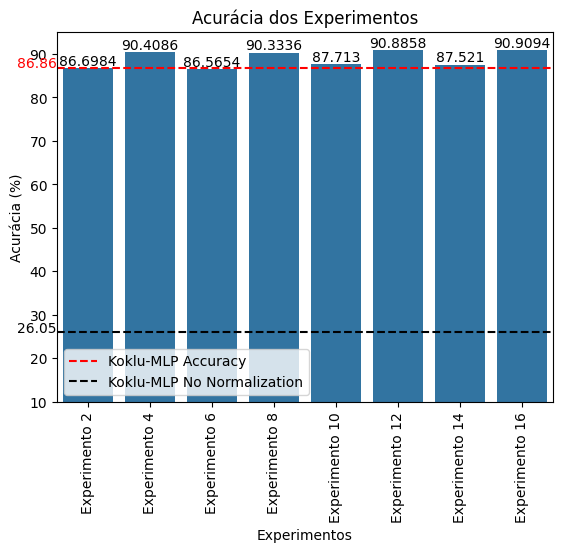

In [21]:
df_mlp = df[(df['classification_method'] == 'mlp') & (df['name'] != 'Koklu-mlp-minmax') & (df['name'] != 'Koklu-mlp--1')]
# Add horizontal line for Koklu-MLP accuracy
koklu_mlp_accuracy = df[df['name'] == 'Koklu-mlp-minmax']['accuracy'].values[0]
koklu_mlp_no_normalization = df[df['name'] == 'Koklu-mlp--1']['accuracy'].values[0]
plt.axhline(y=koklu_mlp_accuracy, color='r', linestyle='--', label='Koklu-MLP Accuracy')
plt.axhline(y=koklu_mlp_no_normalization, color='black', linestyle='--', label='Koklu-MLP No Normalization')
plt.text(-0.5, koklu_mlp_accuracy, str(koklu_mlp_accuracy), color='Red', ha='right', fontsize=10)
plt.text(-0.5, koklu_mlp_no_normalization, str(koklu_mlp_no_normalization), color='Black', ha='right', fontsize=10)
ax = sns.barplot(df, y=df_mlp["accuracy"], x=df_mlp.name, errorbar=None)
plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
plt.xlabel("Experimentos")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(ylim=(10, 95))

Text(0.5, 0, 'Experimentos')

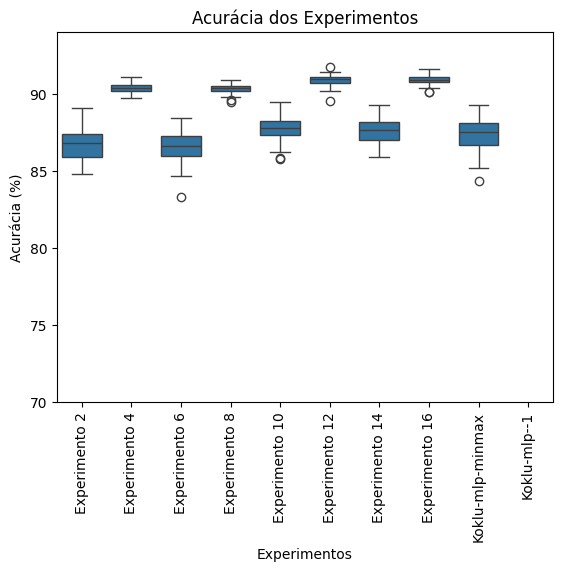

In [25]:
ax = sns.boxplot(data=df_knn, x='name', y='accuracy')
plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
ax.set(ylim=(70, 94))
plt.xlabel("Experimentos")

Text(0.5, 0, 'Experimentos')

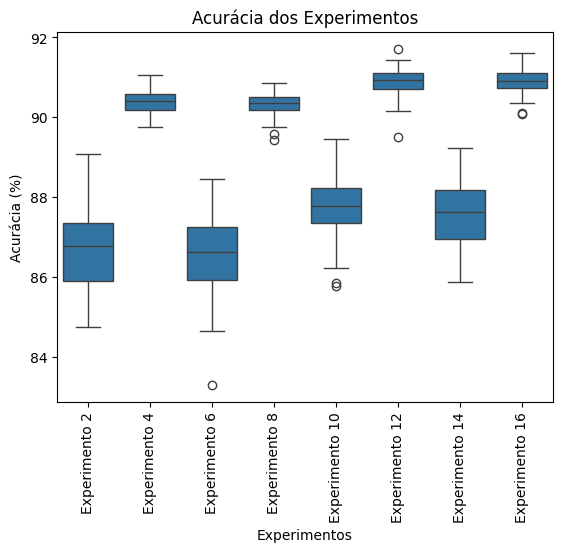

In [23]:
sns.boxplot(data=df_mlp, x='name', y='accuracy')
plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
plt.xlabel("Experimentos")